Q1. Let's assume we want to play badmmton a particular day — say Saturday — how Will you decide whether to play or not. Create decision tree.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = {
    'Weather': ['Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Mild', 'Mild', 'Cool', 'Mild', 'Hot', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'Normal', 'High', 'High', 'Normal', 'High', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Weak', 'Strong', 'Strong', 'Strong', 'Strong', 'Weak', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode categorical features
label_encoders = {}
for column in df.columns[:-1]:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Features and target variable
X = df.drop('Play', axis=1)
y = df['Play']

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier on the dataset
clf.fit(X, y)

w=input("Enter the Weather: ")
t=input("Enter the Temperature: ")
h=input("Enter the Hunmidity: ")
b=input("Enter the Wind: ")
input_features = {
    'Weather': w,
    'Temperature': t,
    'Humidity': h,
    'Wind': b
}

# Transform input features using label encoders
input_features_encoded = [label_encoders[column].transform([input_features[column]])[0] for column in X.columns]

# Predict whether to play or not based on input features
predicted_decision = clf.predict([input_features_encoded])

if predicted_decision == 1:
    print()
    print("Decision: Play")
    print()
else:
    print()
    print("Decision: Don't play")
    print()

Enter the Weather: Cloudy
Enter the Temperature: Hot
Enter the Hunmidity: Normal
Enter the Wind: Weak
Decision: Don't play



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


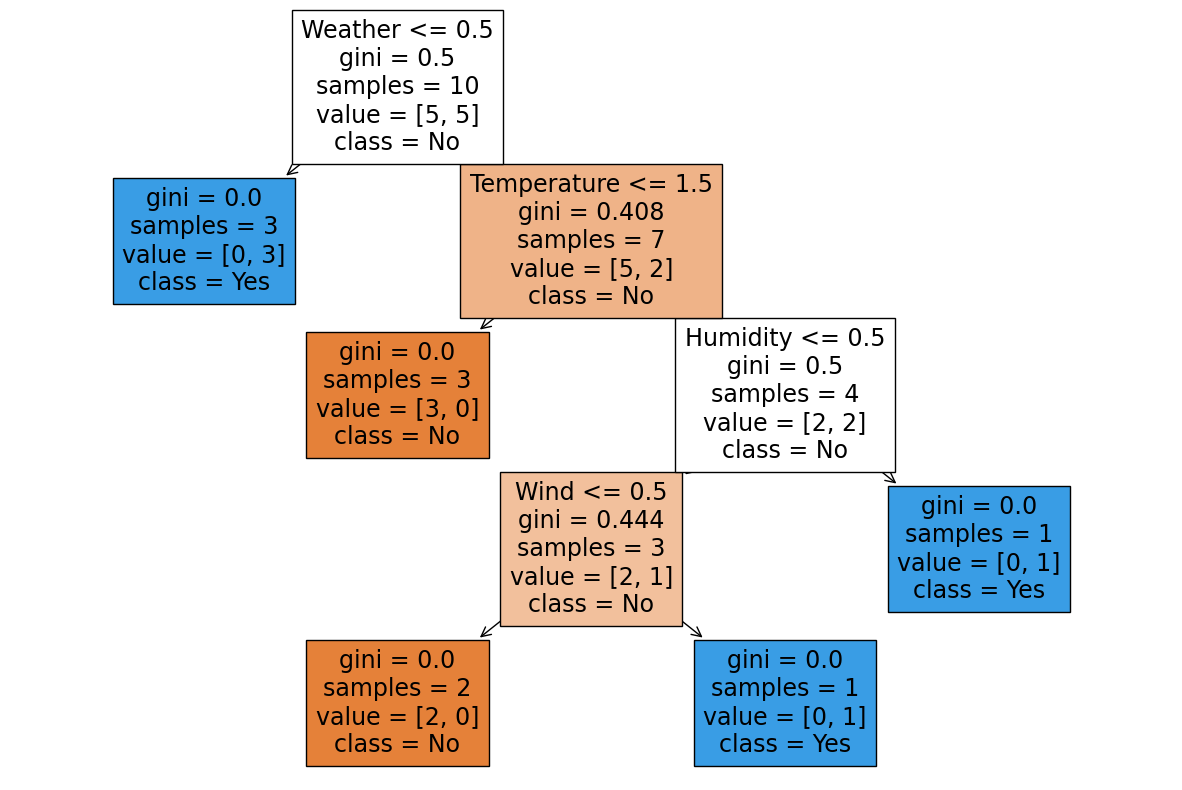

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset and encode categorical features
data = {
    'Weather': ['Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Mild', 'Mild', 'Cool', 'Mild', 'Hot', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'Normal', 'High', 'High', 'Normal', 'High', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Weak', 'Strong', 'Strong', 'Strong', 'Strong', 'Weak', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

label_encoders = {}
for column in df.columns[:-1]:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Features and target variable
X = df.drop('Play', axis=1)
y = df['Play']

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier on the dataset
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


Q2. Your company is considering whether it should tender for two contracts (MS1 and MS2) on offer from a government department for the supply of certain components. The company has three options:  tender for MS1 only; or  tender for MS2 only; or  tender for both MS1 and MS2. If tenders are to be submitted the company will incur additional costs. These costs will have to be entirely recouped from the contract price. The risk, of course, is that if a tender is unsuccessful the company will have made a loss. The cost of tendering for contract MS1 only is £50,000. The component supply cost if the tender is successful would be £18,000. The cost of tendering for contract MS2 only is £14,000. The component supply cost if the tender is successful would be £12,000. The cost of tendering for both contract MS1 and contract MS2 is £55,000. The component supply cost if the tender is successful would be £24,000. For each contract, possible tender prices have been determined. In addition, subjective assessments have been made of the probability of getting the contract with a particular tender price as shown below. Note here that the company can only submit one tender and cannot, for example, submit two tenders (at different prices) for the same contract.

In the event that the company tenders for both MS1 and MS2 it will either win both contracts (at the price shown above) or no contract at all.  What do you suggest the company should do and why?  What are the downside and the upside of your suggested course of action?  A consultant has approached your company with an offer that in return for £20,000 in cash she will ensure that if you tender £60,000 for contract MS2 only your tender is guaranteed to be successful. Should you accept her offer or not and why?

In [ ]:
pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 29.3 MB/s eta 0:00:00


In [ ]:
from pulp import *

# Create a linear programming problem
prob = LpProblem("Contract_Tendering", LpMaximize)

# Define decision variables
tender_MS1 = LpVariable("Tender_MS1", 0, 1, LpBinary)  # 1 if tendering for MS1, 0 otherwise
tender_MS2 = LpVariable("Tender_MS2", 0, 1, LpBinary)  # 1 if tendering for MS2, 0 otherwise

# Additional binary variables for combinations of tenders
tender_both = LpVariable("Tender_Both", 0, 1, LpBinary)  # 1 if tendering for both, 0 otherwise

# Define costs and supply costs
cost_tender_MS1 = 50000
supply_cost_MS1 = 18000
cost_tender_MS2 = 14000
supply_cost_MS2 = 12000
cost_tender_both = 55000
supply_cost_both = 24000

# Define tender prices and probabilities
tender_prices = {
    "MS1_only": [130000, 115000],
    "MS2_only": [70000, 65000, 60000],
    "Both": [190000, 140000]
}
probabilities = {
    "MS1_only": [0.20, 0.85],
    "MS2_only": [0.15, 0.80, 0.95],
    "Both": [0.05, 0.65]
}

# Define the objective function
objective = (
    tender_prices["MS1_only"][0] * probabilities["MS1_only"][0] * tender_MS1
    + tender_prices["MS1_only"][1] * probabilities["MS1_only"][1] * tender_MS1
    + tender_prices["MS2_only"][0] * probabilities["MS2_only"][0] * tender_MS2
    + tender_prices["MS2_only"][1] * probabilities["MS2_only"][1] * tender_MS2
    + tender_prices["MS2_only"][2] * probabilities["MS2_only"][2] * tender_MS2
    + tender_prices["Both"][0] * probabilities["Both"][0] * tender_both
    + tender_prices["Both"][1] * probabilities["Both"][1] * tender_both
)

prob += objective

# Add constraints
prob += tender_MS1 + tender_MS2 + tender_both <= 1  # Can only bid for one or both contracts

# Solve the linear programming problem
prob.solve()

# Print the results
print("Decision Variables:")
print("Tender for MS1:", value(tender_MS1))
print("Tender for MS2:", value(tender_MS2))

print("\nObjective Value (Expected Profit): £", value(prob.objective))


Decision Variables:
Tender for MS1: 1.0
Tender for MS2: 0.0

Objective Value (Expected Profit): £ 123750.0


Decision Tree Rules:
 |--- Tender Price <= 92500.00
|   |--- class: 2.0
|--- Tender Price >  92500.00
|   |--- Tender Price <= 135000.00
|   |   |--- class: 1.0
|   |--- Tender Price >  135000.00
|   |   |--- class: 3.0



[Text(0.4, 0.8333333333333334, 'Tender Price <= 92500.0\ngini = 0.653\nsamples = 7\nvalue = [2, 3, 2]\nclass = MS2 Only'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = MS2 Only'),
 Text(0.6, 0.5, 'Tender Price <= 135000.0\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2]\nclass = MS1 Only'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = MS1 Only'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = MS1 and MS2')]

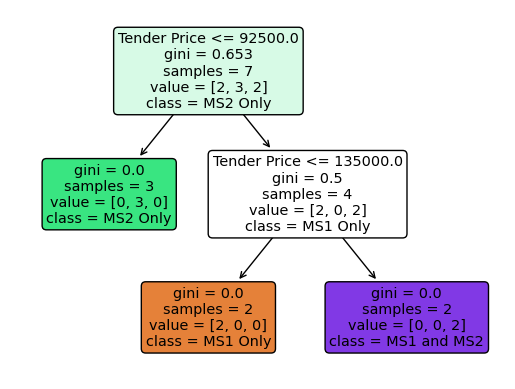

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Define the data
data = [
    [130000, 0.20, 1], [115000, 0.85, 1],
    [70000, 0.15, 2], [65000, 0.80, 2], [60000, 0.95, 2],
    [190000, 0.05, 3], [140000, 0.65, 3]
]

X = np.array(data)[:, :2]  # Input features: possible tender prices and probabilities
y = np.array(data)[:, 2]    # Output labels: 1 for MS1 only, 2 for MS2 only, 3 for both

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Visualize the decision tree
tree_rules = export_text(model, feature_names=['Tender Price', 'Probability'])
print("Decision Tree Rules:\n", tree_rules)

plot_tree(model, feature_names=['Tender Price', 'Probability'], class_names=['MS1 Only', 'MS2 Only', 'MS1 and MS2'], filled=True, rounded=True)
